In [1]:
import numpy as np
import cv2
import os

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html#playing-video-from-file

### Capture video from camera

In [16]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

all_frames=[]

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    all_frames.append(gray)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [17]:
len(all_frames)

127

In [4]:
import matplotlib.pyplot as plt

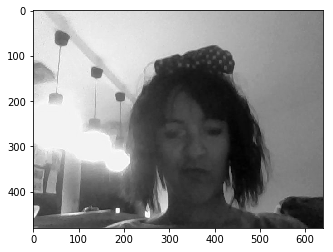

In [9]:
# img=cv2.imread("bgrImage.png",cv2.IMREAD_UNCHANGED)
# img=cv2.imread("bgrImage.png",0)
# plt.imshow(gray,interpolation="bicubic")
plt.imshow(gray, cmap="gray")
# plt.imshow(img)
plt.show()

Text(0.5,1,'image en niveau de gris')

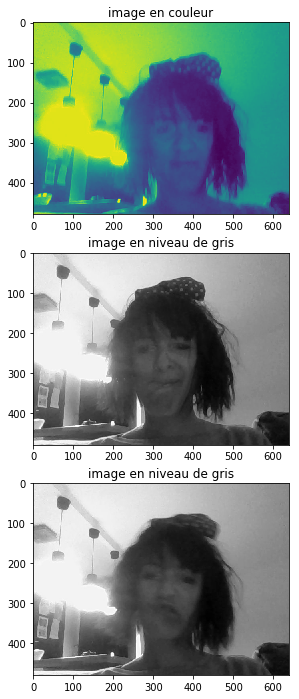

In [19]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.imshow(all_frames[0])
plt.title('image en couleur')
plt.subplot(3,1,2)
plt.imshow(all_frames[40],cmap="gray") #attention il y a quelque chose à ajouter !
plt.title('image en niveau de gris')
plt.subplot(3,1,3)
plt.imshow(all_frames[100],cmap="gray") #attention il y a quelque chose à ajouter !
plt.title('image en niveau de gris')

### Playing Video from file

In [22]:
import numpy as np
import cv2

path=r"C:\Users\Hanane\Downloads"
cap = cv2.VideoCapture(path+'\\alors.mov')

all_frames_v=[]

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    all_frames_v.append(gray)
    
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [23]:
len(all_frames_v)

459

Text(0.5,1,'image en niveau de gris')

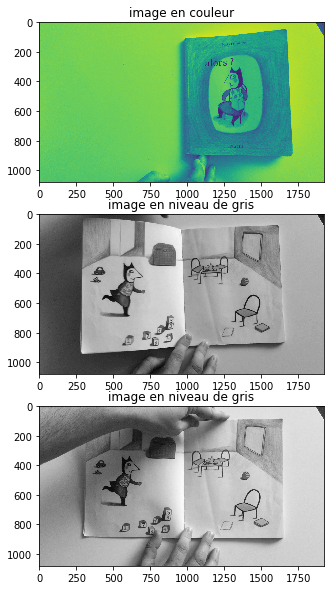

In [28]:
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.imshow(all_frames_v[0])
plt.title('image en couleur')
plt.subplot(3,1,2)
plt.imshow(all_frames_v[100],cmap="gray") #attention il y a quelque chose à ajouter !
plt.title('image en niveau de gris')
plt.subplot(3,1,3)
plt.imshow(all_frames_v[200],cmap="gray") #attention il y a quelque chose à ajouter !
plt.title('image en niveau de gris')

# Exercice 1 : extraire les trames à traiter
Extraire environ 50 images de l’une des deux vidéos

### Capture frames every 30 seconds

https://stackoverflow.com/questions/22704936/reading-every-nth-frame-from-videocapture-in-opencv

In [33]:
# import cv2

path=r"C:\Users\Hanane\Downloads"
cap = cv2.VideoCapture(path+'\\alors.mov')
count = 0

while cap.isOpened() and count<1500:
    ret, frame = cap.read()

    if ret:
        cv2.imwrite('output_frames\\frame{:d}.jpg'.format(count), frame)
        count += 30 # i.e. at 30 fps, this advances one second
        cap.set(1, count)
    else:
        cap.release()
        break


In [32]:
50*30

1500

## EXERCICE 2: Le jeu des 7 erreurs

Le script qui suit vous est proposé : hélas il présente 7 erreurs. A vous de le corriger !

Text(0.5,1,'exploration de lespace des attributs')

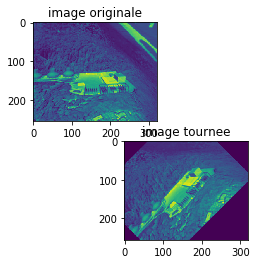

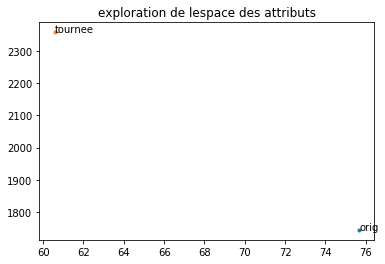

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# grayImage = cv2.imread('frame0.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
grayImage = cv2.imread('00000002.jpg', cv2.IMREAD_GRAYSCALE)

#rotation de l'image de 45 degrés

# rows,cols = Image.shape
rows,cols = grayImage.shape

M = cv2.getRotationMatrix2D((rows/2,cols/2),45,1)
Image = cv2.warpAffine(grayImage,M,(cols,rows))

plt.figure(0)
plt.subplot(2,2,1)
plt.imshow(grayImage)
plt.title('image originale')
plt.subplot(2,1,2)
# plt.imshow(destImage)
plt.imshow(Image)
plt.title('image tournee')

#qu'observez­vous ?
# mr = numpy.moyenne(grayImage)
m = np.mean(grayImage)

# mr = numpy.moyenne(destImage)
mr = np.mean(Image)

# v= numpy.variance(grayImage)
v= np.var(grayImage)

# vr = numpy.variance(destImage)
vr= np.var(Image)

plt.figure(1)
x=[m, mr]
y=[v, vr]
plt.plot(m, v, '.')
plt.annotate('orig', [m,v])
plt.plot(mr, vr, '.')
plt.annotate('tournee', [mr,vr])
plt.title('exploration de l''espace des attributs')

## EXERCICE 3

In [ ]:
les images sur lesquels il faut travailler sont dans:
    C:\Users\Hanane\Documents\Python_Scripts\TelecomParis\Module_4_Donnees_Multimedia\images\TP1
il y a déjà le fichier list.txt

le fichier txt créé via la commande "ls *.jpg > list.txt" sur windows est difficile à parser. Je préfère travailler directement sur la récupération des fichiers dans un folder via python

##### TP Method

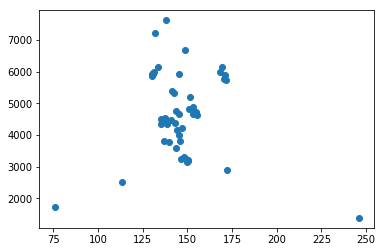

In [5]:
mean_array=[]
var_array=[]

f = open('list.txt', 'rt')
for line in f:
    w = line.split()[0]
#     print(w)
    img=cv2.imread(w, cv2.IMREAD_GRAYSCALE)
    mean_array.append(np.mean(img))
    var_array.append(np.var(img))
## PLOT
# plt.scatter(img_array,mean_array)

f.close()
plt.scatter(mean_array,var_array)

Récupération des noms des fichiers

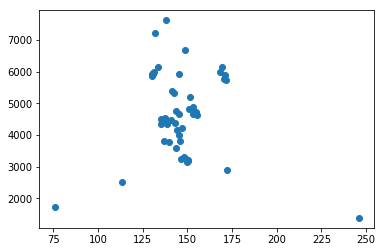

In [81]:
from os import listdir
from os.path import isfile, join

# path="output_frames" #MY Owne images
path="images\TP1"
files_img = [f for f in listdir(path) if isfile(join(path, f)) and '.jpg' in f]  

mean_array=[]
var_array=[]
img_array=[]
path="images\TP1"

for file in files_img:
    img_nbr=int(file[5:-4])
    img=cv2.imread(path+"\\"+file,cv2.IMREAD_GRAYSCALE)
    
    img_array.append(img_nbr)
    mean_array.append(np.mean(img))
    var_array.append(np.var(img))
## PLOT
# plt.scatter(img_array,mean_array)
plt.scatter(mean_array,var_array)

https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory